## K-Nearest Neighbour Regressor

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
## creating the dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=3, noise=5, random_state=42)

In [3]:
## Train, Test, Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
## importing KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

In [5]:
## making regressor object
regressor = KNeighborsRegressor(n_neighbors=6, algorithm="auto")

In [6]:
## model building
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [7]:
## making predictions
y_pred = regressor.predict(X_test)

In [12]:
## checking the performance of the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_pred, y_test))

MSE: 489.81019208526845
MAE: 15.273894888645797
R2 Score: 0.963197088987312


### Performing Grid Search CV

In [16]:
## importing the required module from sklearn library
from sklearn.model_selection import GridSearchCV

In [20]:
## defining the parameters
params_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['kd_tree', "ball_tree", "brute"]
}

In [21]:
## making the grid object
grid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid=params_grid, cv=4)

In [24]:
## training the model
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'ball_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [25]:
## checking the best parameters
grid.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 3}

In [26]:
## making predictions
y_grid_predict = grid.predict(X_test)

In [28]:
## checking the performance of the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("MSE:", mean_squared_error(y_test, y_grid_predict))
print("MAE:", mean_absolute_error(y_test, y_grid_predict))
print("R2 Score:", r2_score(y_grid_predict, y_test))

MSE: 430.96658033428514
MAE: 14.581695767885432
R2 Score: 0.9693212030915748


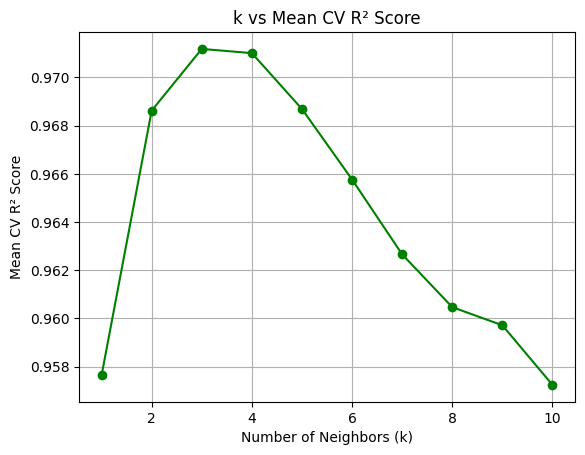

In [ ]:
## Plotting k vs R2 score
import pandas as pd
import matplotlib.pyplot as plt

# Convert cv_results_ to DataFrame
results_df = pd.DataFrame(grid.cv_results_)

# Group by n_neighbors and compute mean R² score across all other parameters (algorithm etc.)
mean_scores = results_df.groupby('param_n_neighbors')['mean_test_score'].mean()

# Plot
mean_scores.plot(marker='o', color='green')
plt.title("k vs Mean CV R² Score")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV R² Score")
plt.grid(True)
plt.show()

#### Comparing it with Linear Regression 

In [32]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("\nLinear Regression R2 Score:", r2_score(y_test, lr_pred))


Linear Regression R2 Score: 0.998482296599


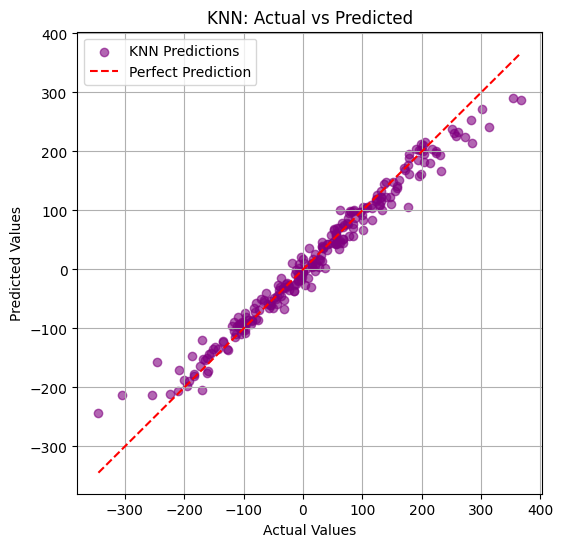

In [ ]:
import numpy as np

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, label='KNN Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')

## defining labels and titles
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()
